<a href="https://colab.research.google.com/github/bathiya-94/semEval2024Task_05/blob/main/Task_with_simple_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook
import transformers
import os
import tarfile
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

In [3]:
pip install simpletransformers

In [4]:
from simpletransformers.classification import ClassificationModel

# Data Preprocessing


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
os.chdir("/content/drive/My Drive/semeval-task-5")
print(os.listdir())

['dataset_semeval24_traindev', 'test-nb-3.ipynb', 'dataset-train-dev-semeval24.tar.gz', 'train.csv', 'bert-tutorial.ipynb', 'task-5-dataset-playground.ipynb', 'saved_weights.pt', 'BERT_with_legal_dataset_1.ipynb', 'cache_dir', 'outputs', 'runs', 'Task_with_simple_transformers.ipynb', 'output.csv', 'output2.csv']


In [7]:
file = tarfile.open('dataset-train-dev-semeval24.tar.gz', 'r:gz')
print(file.getnames())

['dataset_semeval24_traindev', 'dataset_semeval24_traindev/README.md', 'dataset_semeval24_traindev/dev.csv', 'dataset_semeval24_traindev/train.csv']


In [8]:
with tarfile.open('dataset-train-dev-semeval24.tar.gz', 'r:gz') as tar:
   tar.extractall()

In [14]:
train_df = pd.read_csv('dataset_semeval24_traindev/train.csv')
print(train_df.columns)

Index(['idx', 'question', 'answer', 'label', 'analysis', 'complete analysis',
       'explanation'],
      dtype='object')


In [15]:
train_df.head(5)

,idx,question,answer,label,analysis,complete analysis,explanation
0,0,"1. Redistricting. Dziezek, who resides in the ...",the Western District of Kentucky.,0,So the remaining question is whether the West...,"Let’s see. Under §1391(b)(1), venue is proper ...",Venue in most federal actions is governed by 2...
1,1,"1. Redistricting. Dziezek, who resides in the ...",the Southern District of Indiana.,0,But B is clearly not: the plaintiff’s residenc...,"Let’s see. Under §1391(b)(1), venue is proper ...",Venue in most federal actions is governed by 2...
2,2,"1. Redistricting. Dziezek, who resides in the ...",the Southern District of Ohio.,1,"Let’s see. Under §1391(b)(1), venue is proper ...","Let’s see. Under §1391(b)(1), venue is proper ...",Venue in most federal actions is governed by 2...
3,3,"2. Venue exercises. Chu, a Californian, went s...",proper in the Southern District of California ...,0,A is pretty clearly wrong. Although §1391(b)(2...,This question didn’t give my students much tro...,The venue provisions in §1391(b) also apply in...
4,4,"2. Venue exercises. Chu, a Californian, went s...",proper in the District of Colorado under §1391...,0,"B is another loser. First of all, Jackson does...",This question didn’t give my students much tro...,The venue provisions in §1391(b) also apply in...


In [16]:
counts = train_df['label'].value_counts()
print(counts)

0    505
1    161
Name: label, dtype: int64


In [17]:
train_df['text'] = "context: " + train_df['question'] + ". question: " + train_df['answer']
train_df.drop(labels=['idx', 'question', 'answer', 'analysis', 'complete analysis',
       'explanation'], axis = 1, inplace=True)
print(train_df.columns)
train_df.head()

Index(['label', 'text'], dtype='object')


,label,text
0,0,"context: 1. Redistricting. Dziezek, who reside..."
1,0,"context: 1. Redistricting. Dziezek, who reside..."
2,1,"context: 1. Redistricting. Dziezek, who reside..."
3,0,"context: 2. Venue exercises. Chu, a California..."
4,0,"context: 2. Venue exercises. Chu, a California..."


In [19]:
train_df = train_df[['text', 'label' ]]
train_df.rename(columns={'label': 'labels'}, inplace=True)
train_df.head()

,text,labels
0,"context: 1. Redistricting. Dziezek, who reside...",0
1,"context: 1. Redistricting. Dziezek, who reside...",0
2,"context: 1. Redistricting. Dziezek, who reside...",1
3,"context: 2. Venue exercises. Chu, a California...",0
4,"context: 2. Venue exercises. Chu, a California...",0


Text(0, 0.5, 'Frequency')

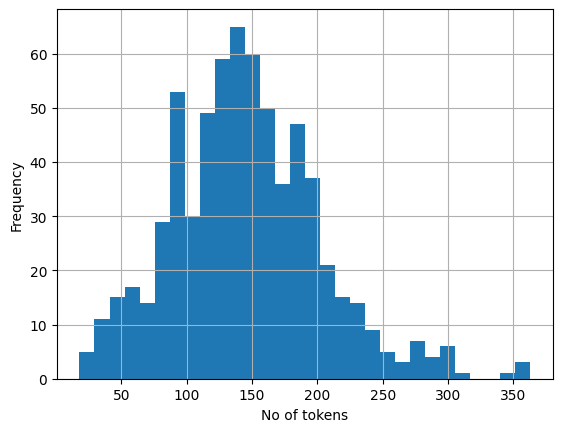

In [21]:
seq_len = [len(i.split()) for i in train_df['text']]
s= pd.Series(seq_len).hist(bins = 30)
s.set_xlabel('No of tokens')
s.set_ylabel('Frequency')

# Model

In [22]:
model_args = {
    'num_train_epochs':10,
    'learning_rate': 3e-5,
    'max_seq_length':  512,
    'train_batch_size': 8,
    'eval_batch_size': 8,

}

In [24]:
# Create a TransformerModel
model = ClassificationModel('distilbert', 'distilbert-base-uncased', args=model_args)

# Train the model
model.train_model(train_df)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/666 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/84 [00:00<?, ?it/s]

(840, 0.5014190832773845)

# Evaluation

In [25]:
dev_df = pd.read_csv('dataset_semeval24_traindev/dev.csv')
print(dev_df.head(5))

   idx                                           question  \
0    0  7. A venue medley. Zirkhov brings a diversity ...   
1    1  7. A venue medley. Zirkhov brings a diversity ...   
2    2  7. A venue medley. Zirkhov brings a diversity ...   
3    3  7. Comedy of errors. Laurel and Hardy are inju...   
4    4  7. Comedy of errors. Laurel and Hardy are inju...   

                                              answer  label  \
0  The court must transfer the action to the West...      0   
1  The court will have to dismiss, since 28 U.S.C...      0   
2  The court could transfer the action under 28 U...      0   
3  reverse the decision in Fields’s case, and rem...      0   
4  reverse the decision in Fields’s case, and rem...      1   

                                            analysis  \
0  C suggests that the judge must transfer under ...   
1  Nibbling away at the edges, consider D, which ...   
2  A good place to start is to ask whether venue ...   
3  In this example the federal

In [26]:
dev_df['text'] = "context: " + dev_df['question'] + ". question: " + dev_df['answer']
dev_df.drop(labels=['idx', 'question', 'answer', 'analysis', 'complete analysis',
       'explanation'], axis = 1, inplace=True)

In [27]:
dev_df = dev_df[['text', 'label' ]]
dev_df.rename(columns={'label': 'labels'}, inplace=True)
dev_df.head()

,text,labels
0,context: 7. A venue medley. Zirkhov brings a d...,0
1,context: 7. A venue medley. Zirkhov brings a d...,0
2,context: 7. A venue medley. Zirkhov brings a d...,0
3,context: 7. Comedy of errors. Laurel and Hardy...,0
4,context: 7. Comedy of errors. Laurel and Hardy...,1


In [28]:
dev_df.shape

(84, 2)

In [29]:
result, model_outputs, wrong_predictions = model.eval_model(dev_df)

  0%|          | 0/84 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/11 [00:00<?, ?it/s]

In [30]:
print(result)

{'mcc': -0.02465401844283986, 'tp': 1, 'tn': 62, 'fp': 5, 'fn': 16, 'auroc': 0.508340649692713, 'auprc': 0.21531766504735436, 'eval_loss': 0.6419254649769176}


In [31]:
preds = np.argmax(model_outputs, axis = 1)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [33]:
test_y = dev_df['labels'].values
test_y

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [34]:
f1 = f1_score(test_y, preds, average="macro")
f1

0.471064467766117

In [35]:
acc = accuracy_score(test_y, preds)
acc

0.75

In [45]:
combined = np.column_stack((np.arange(len(preds)).astype(int), preds.astype(int)))

# Write the combined array to a CSV file
np.savetxt("output.csv", combined, delimiter=",", header="idx,baseline",  fmt='%s, %s',comments="")